# Hackathon - Meteo Data - Export Future data

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Inputs

In [171]:
in_file = 'dept79_2022-2080_Rcp26/extract.txt'
out_file_for_model_culture = '79175_2023_Rcp26_Azodyn.csv'
out_file_for_model_meteo = None
photoperiod_file = 'extract_photoperiod_Limoge_2000.csv'
drias_header = "Date Latitude Longitude  tasminAdjust tasmaxAdjust tasAdjust prtotAdjust hussAdjust rsdsAdjust rldsAdjust sfcWindAdjust evspsblpotAdjust"
plot_check = True
select_station = True
year_selection = True
meteo_model = False
export_meteo_for_model_meteo = False
culture_model = True
export_meteo_for_model_culture = True
station_coord = [46.1372, 0.00739]
selected_year = 2023

# Specific functions

In [172]:
def adapt_data_for_model(data, model, plot=False):
    # adjust date
    data.loc[:,'Date'] = pd.to_datetime(data.loc[:,'Date'], format ='%d/%m/%Y')
    data.loc[:,"JOUR"] = data.loc[:,"Date"].apply(lambda x: x.day)
    data.loc[:,"MOIS"] = data.loc[:,"Date"].apply(lambda x: x.month)
    data.loc[:,"AN"] = data.loc[:,"Date"].apply(lambda x: x.year)
    # convert RG
    for m in data.loc[:,"MOIS"].unique():
        mean_photo = photoperiode.loc[m-1,'Mean']
        conv_factor = mean_photo*3600/10000
        adj_conv_factor=1.1*conv_factor
        subset = data.loc[data.loc[:,'MOIS'] == m, 'rsdsAdjust']
        data.loc[data.loc[:,'MOIS'] == m,'RG'] = subset*adj_conv_factor
    #Format column names
    out_data = data.drop(columns='rsdsAdjust')
    
    if model == 'meteo':
        out_data.rename(columns={'tasAdjust': 'TM', 'sfcWindAdjust': 'FFM', 
                             'prtotAdjust':'RR', 'tasminAdjust':'TN', 'tasmaxAdjust':'TX',
                             'evspsblpotAdjust':'ETPMON'}, inplace=True)
        out_data.drop(columns=['hussAdjust', 'JOUR', 'MOIS', 'AN','rldsAdjust', 'RG'], inplace=True)
        if plot_check:
            checkplot_data_for_meteo_model(out_data)
    elif model == 'culture':
        out_data.rename(columns={'tasminAdjust': 'TN', 'tasmaxAdjust': 'TX',
                             'prtotAdjust':'RR',
                             'evspsblpotAdjust':'ETPP'}, inplace=True)
        if plot_check:
            checkplot_data_for_culture_model(out_data)
        out_data.drop(columns=['Latitude', 'Longitude','Date', 'tasAdjust', 'hussAdjust', 'rldsAdjust','sfcWindAdjust'], inplace=True)
        out_data = out_data[['AN', 'MOIS', 'JOUR', 'ETPP', 'RG', 'RR', 'TN','TX']]
    else:
        print('Model should be either "meteo" or "culture"!')
        
    return(out_data)

In [173]:
def checkplot_data_for_meteo_model(data):
    plt.figure(figsize=(30,15))
    plt.scatter(data["Date"], data["TM"])
    plt.title("Temperature Moyenne, C", fontsize=20)
    plt.show
    
    plt.figure(figsize=(30,15))
    plt.scatter(data["Date"], data["RR"])
    plt.title("Hauteur de précipitations, mm", fontsize=20)
    plt.show
    
    plt.figure(figsize=(30,15))
    plt.scatter(data["Date"], data["FFM"])
    plt.title("Vitesse du vent moyenne, m/s", fontsize=20)
    plt.show
    
    plt.figure(figsize=(30,15))
    plt.scatter(data["Date"], data["ETPMON"])
    plt.title("Evapotranspiration, mm", fontsize=20)
    plt.show

In [174]:
def checkplot_data_for_culture_model(data):
    plt.figure(figsize=(30,15))
    plt.scatter(data["Date"], data["TN"])
    plt.title("Temperature Minimale, C", fontsize=20)
    plt.show
    
    plt.figure(figsize=(30,15))
    plt.scatter(data["Date"], data["TX"])
    plt.title("Temperature Maximale, C", fontsize=20)
    plt.show
    
    plt.figure(figsize=(30,15))
    plt.scatter(data["Date"], data["RR"])
    plt.title("Hauteur de précipitations, mm", fontsize=20)
    plt.show
       
    plt.figure(figsize=(30,15))
    plt.scatter(data["Date"], data["ETPP"])
    plt.title("Evapotranspiration, mm", fontsize=20)
    plt.show
    
    plt.figure(figsize=(30,15))
    plt.scatter(data["Date"], data["RG"])
    plt.title("Rayonnement global, J/cm²", fontsize=20)
    plt.show

## Open files

### Photoperiod 

In [175]:
photoperiode = pd.read_csv(photoperiod_file, sep=';')

In [176]:
photoperiode.loc[:,'Mean'] = photoperiode.loc[:,['Min', 'Max']].mean(axis = 1)

### Drias data

In [177]:
header = drias_header.split(" ")
header = list(filter(None, header))

In [178]:
data = pd.read_csv(in_file, sep=';', skipinitialspace=True, header=None, names=header)

In [179]:
data.head()

,Date,Latitude,Longitude,tasminAdjust,tasmaxAdjust,tasAdjust,prtotAdjust,hussAdjust,rsdsAdjust,rldsAdjust,sfcWindAdjust,evspsblpotAdjust
0,01/01/2022,45.9912,-0.0897,5.68,7.55,6.93,13.820,5.978,24.035,342.850,5.392,0.234
1,02/01/2022,45.9912,-0.0897,3.77,8.35,6.07,6.019,5.557,32.936,339.237,4.113,0.282
2,03/01/2022,45.9912,-0.0897,3.03,7.80,5.99,0.564,4.237,84.117,297.455,3.753,0.796
3,04/01/2022,45.9912,-0.0897,5.86,9.24,7.24,15.360,6.379,13.753,356.430,4.144,0.221
4,05/01/2022,45.9912,-0.0897,2.66,7.80,5.02,12.681,5.728,24.000,327.001,3.815,0.128


## Create data for meteo model

In [180]:
if meteo_model :
    if plot_check:
        data_meteo = adapt_data_for_model(data, 'meteo', plot=True)
    else:
        data_meteo = adapt_data_for_model(data, 'meteo')  
    data_meteo.head()
    if export_meteo_for_model_meteo:
        data_meteo.to_csv(out_file_for_model_meteo, sep=';', index=False)

## Create data for culture model

In [181]:
data.head()

,Date,Latitude,Longitude,tasminAdjust,tasmaxAdjust,tasAdjust,prtotAdjust,hussAdjust,rsdsAdjust,rldsAdjust,sfcWindAdjust,evspsblpotAdjust
0,01/01/2022,45.9912,-0.0897,5.68,7.55,6.93,13.820,5.978,24.035,342.850,5.392,0.234
1,02/01/2022,45.9912,-0.0897,3.77,8.35,6.07,6.019,5.557,32.936,339.237,4.113,0.282
2,03/01/2022,45.9912,-0.0897,3.03,7.80,5.99,0.564,4.237,84.117,297.455,3.753,0.796
3,04/01/2022,45.9912,-0.0897,5.86,9.24,7.24,15.360,6.379,13.753,356.430,4.144,0.221
4,05/01/2022,45.9912,-0.0897,2.66,7.80,5.02,12.681,5.728,24.000,327.001,3.815,0.128


### Select station

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

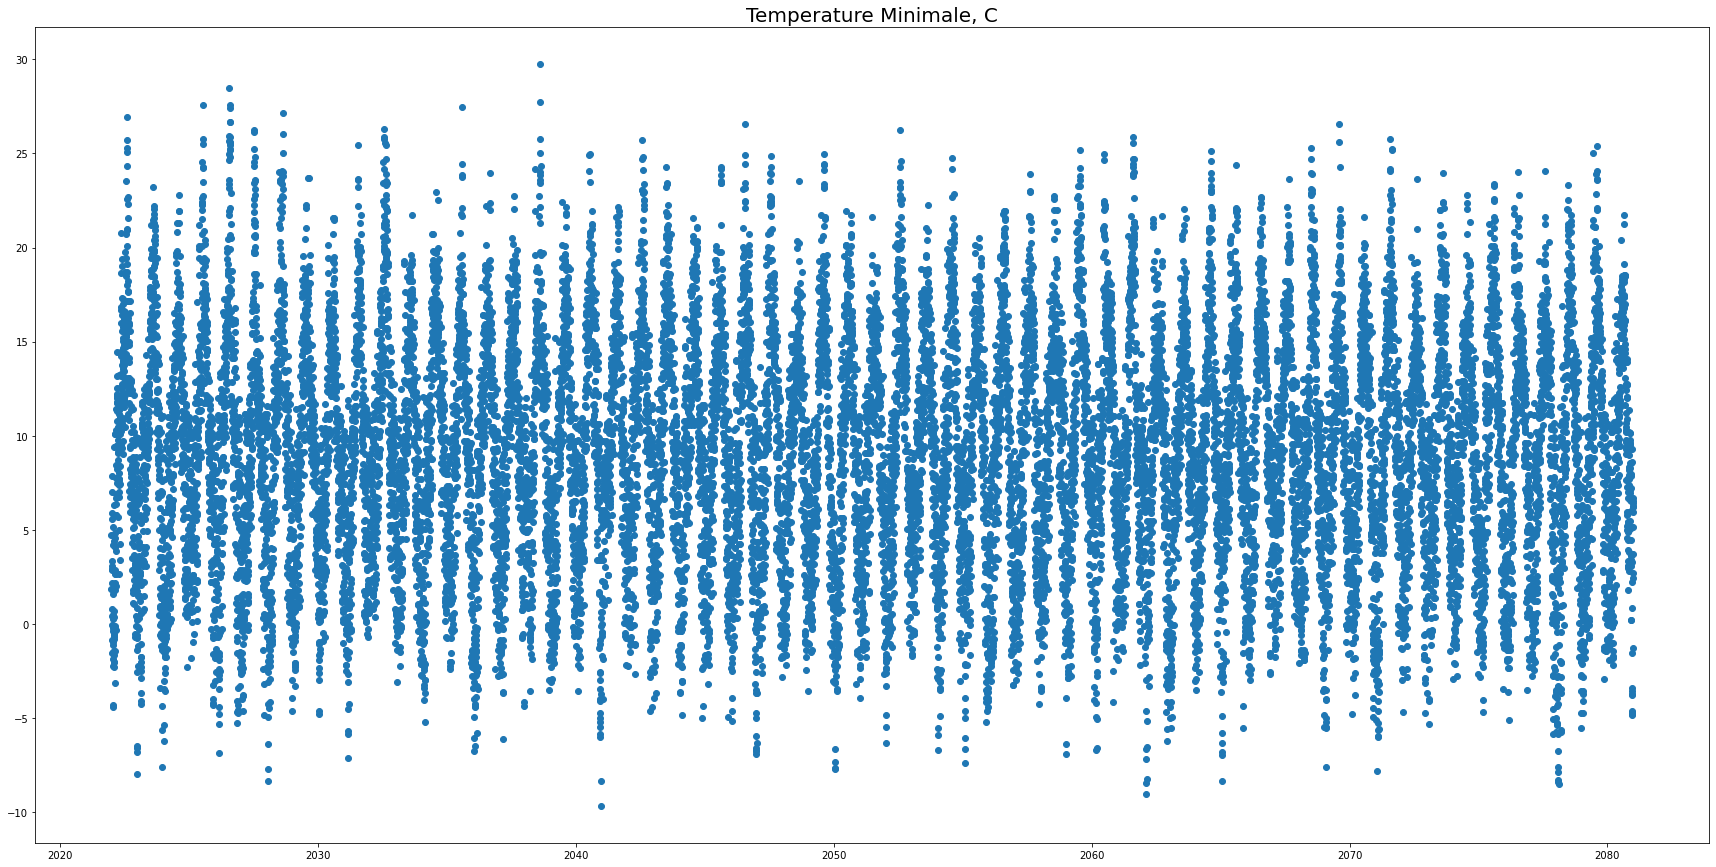

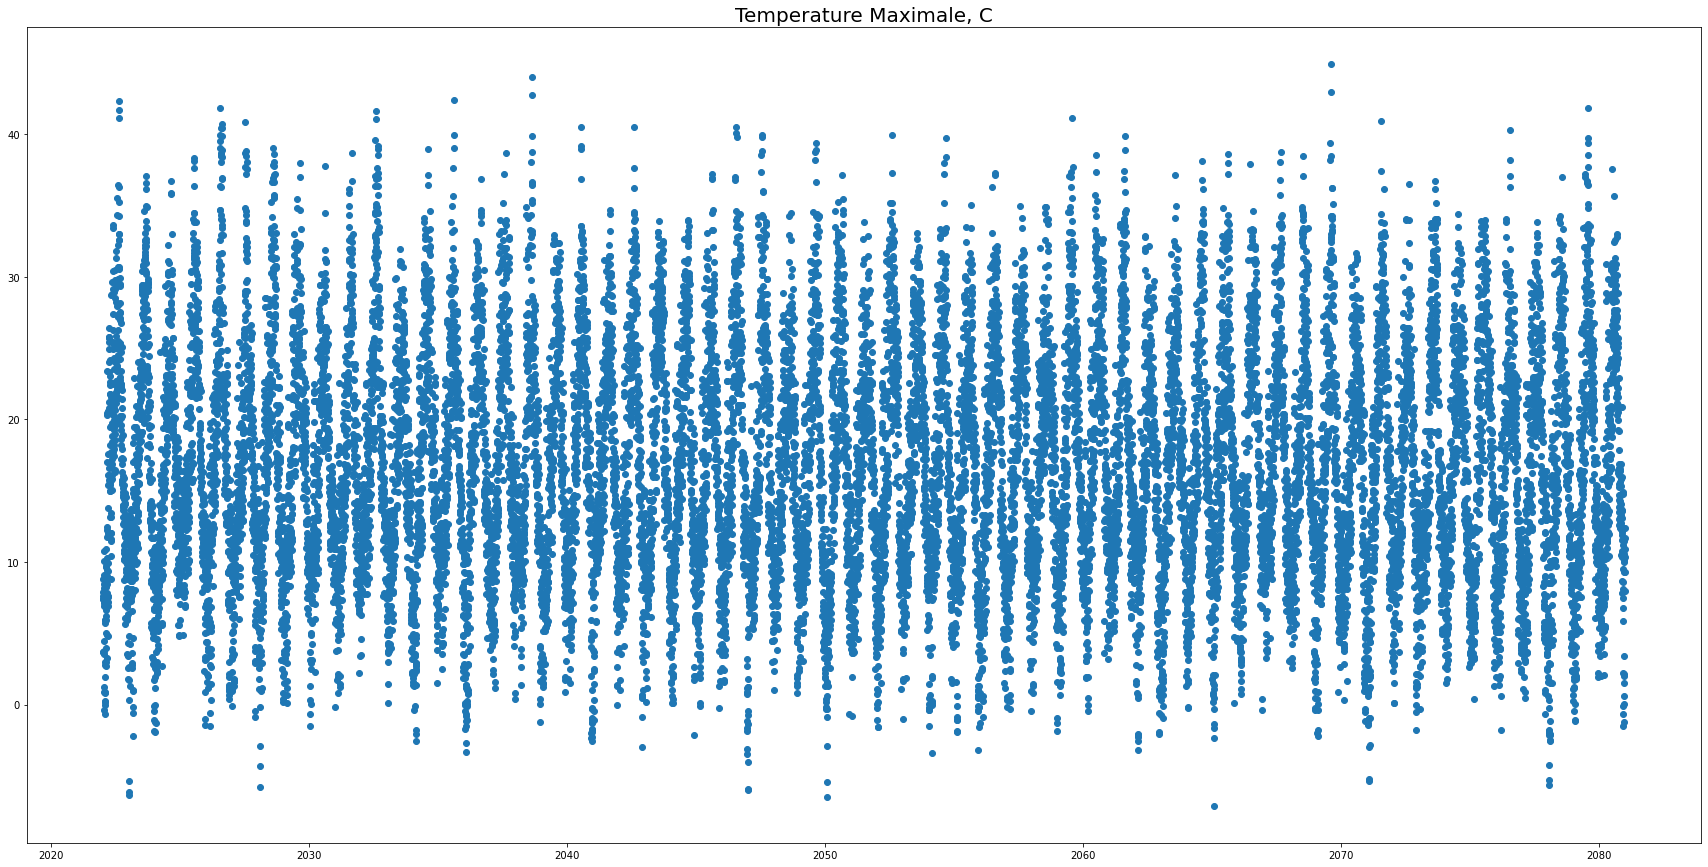

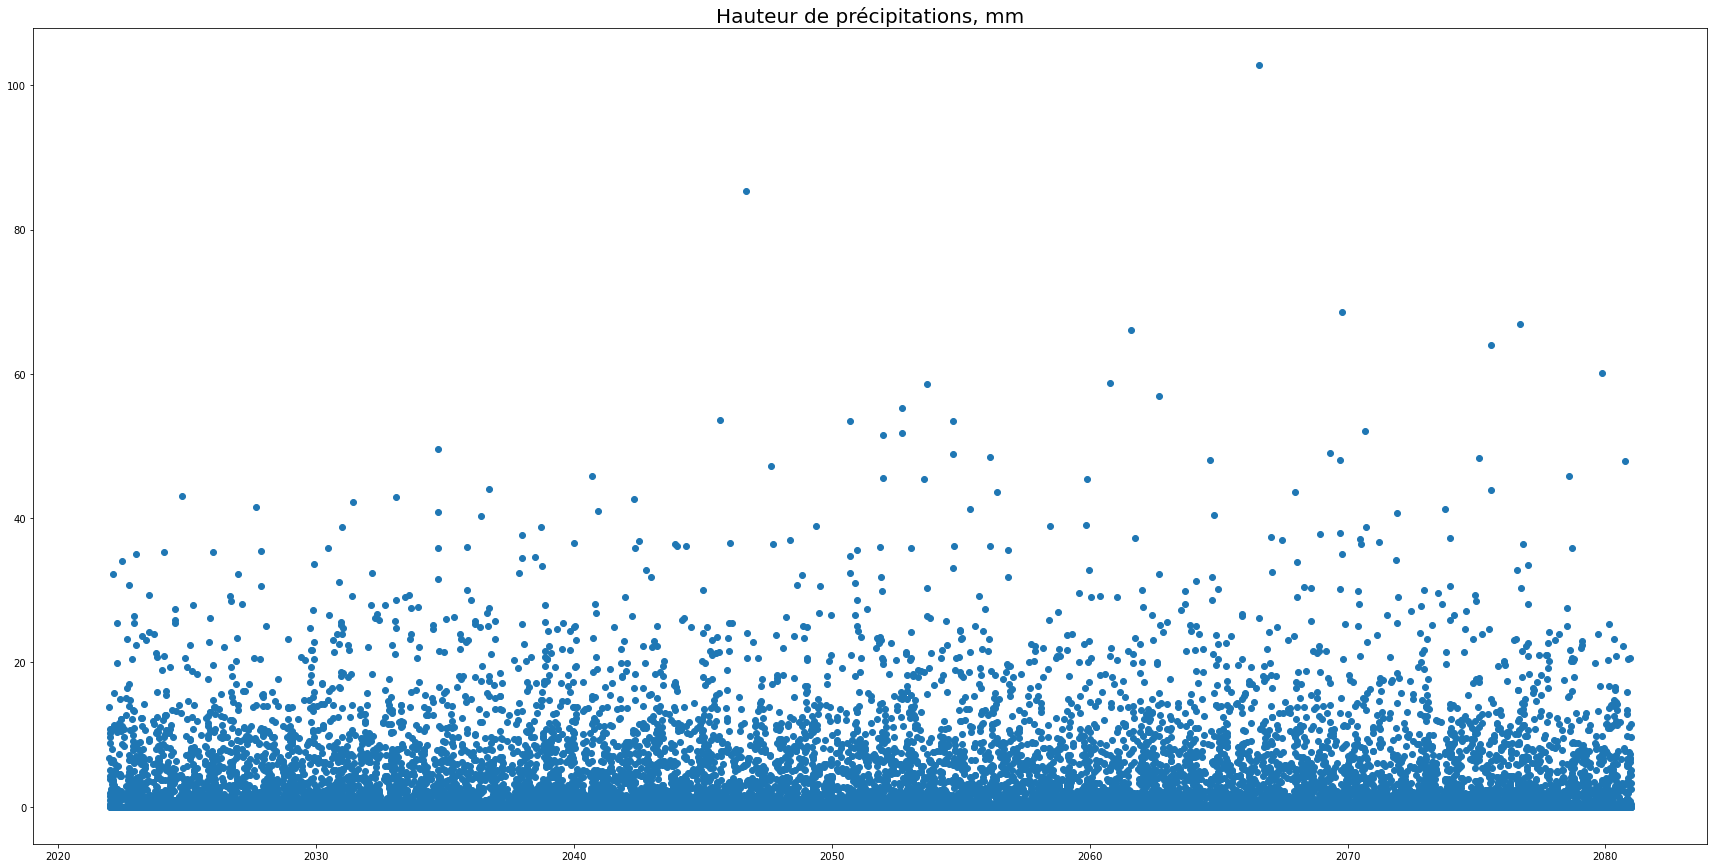

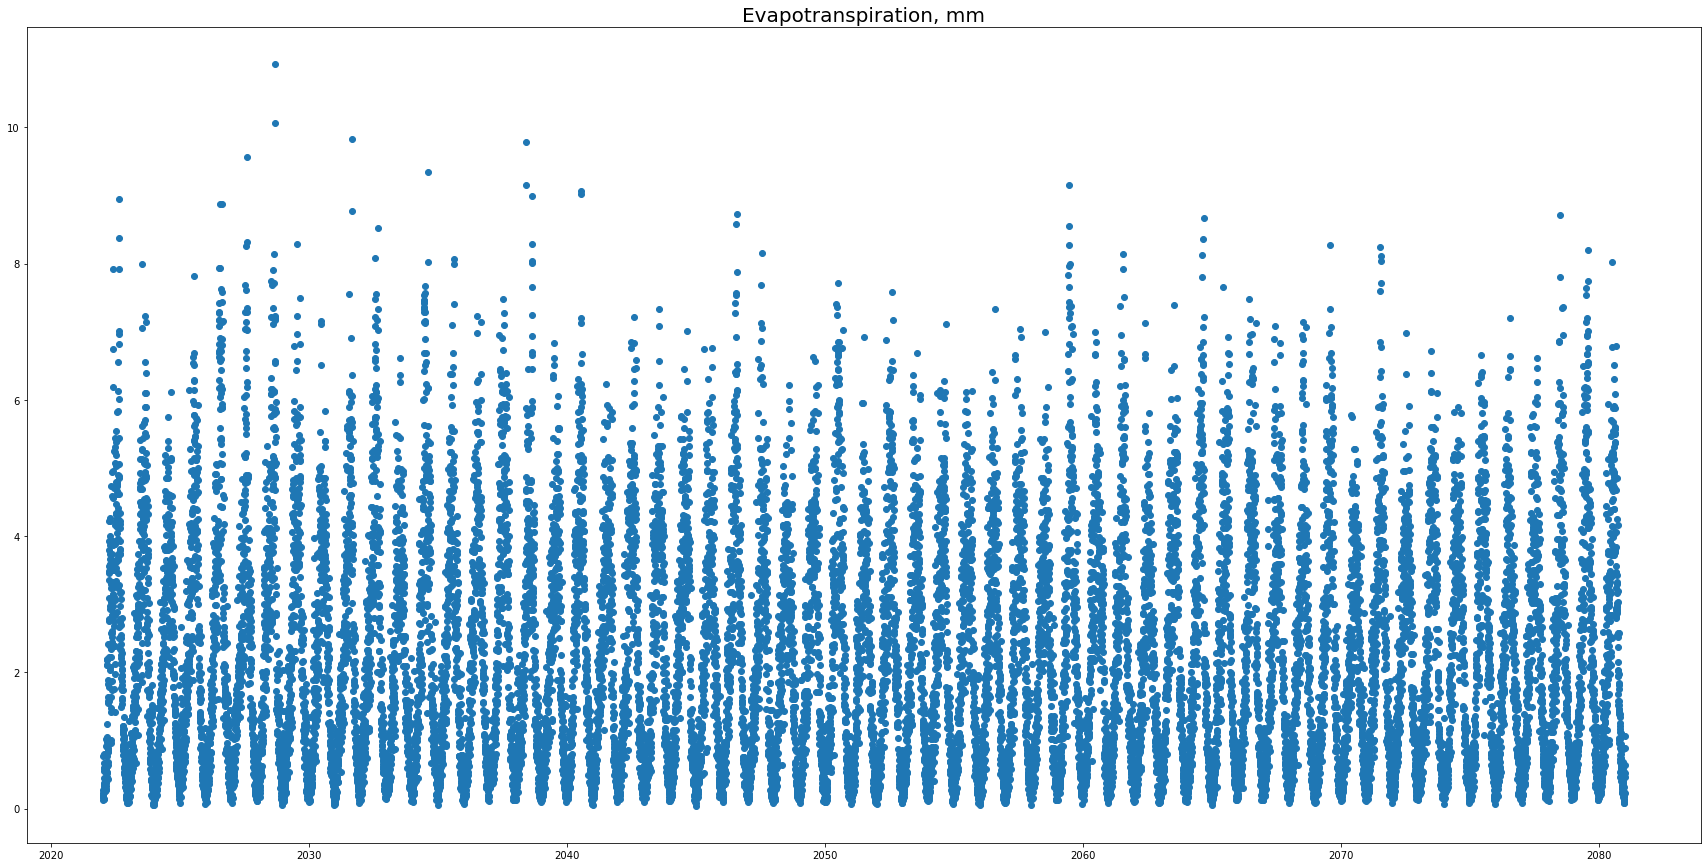

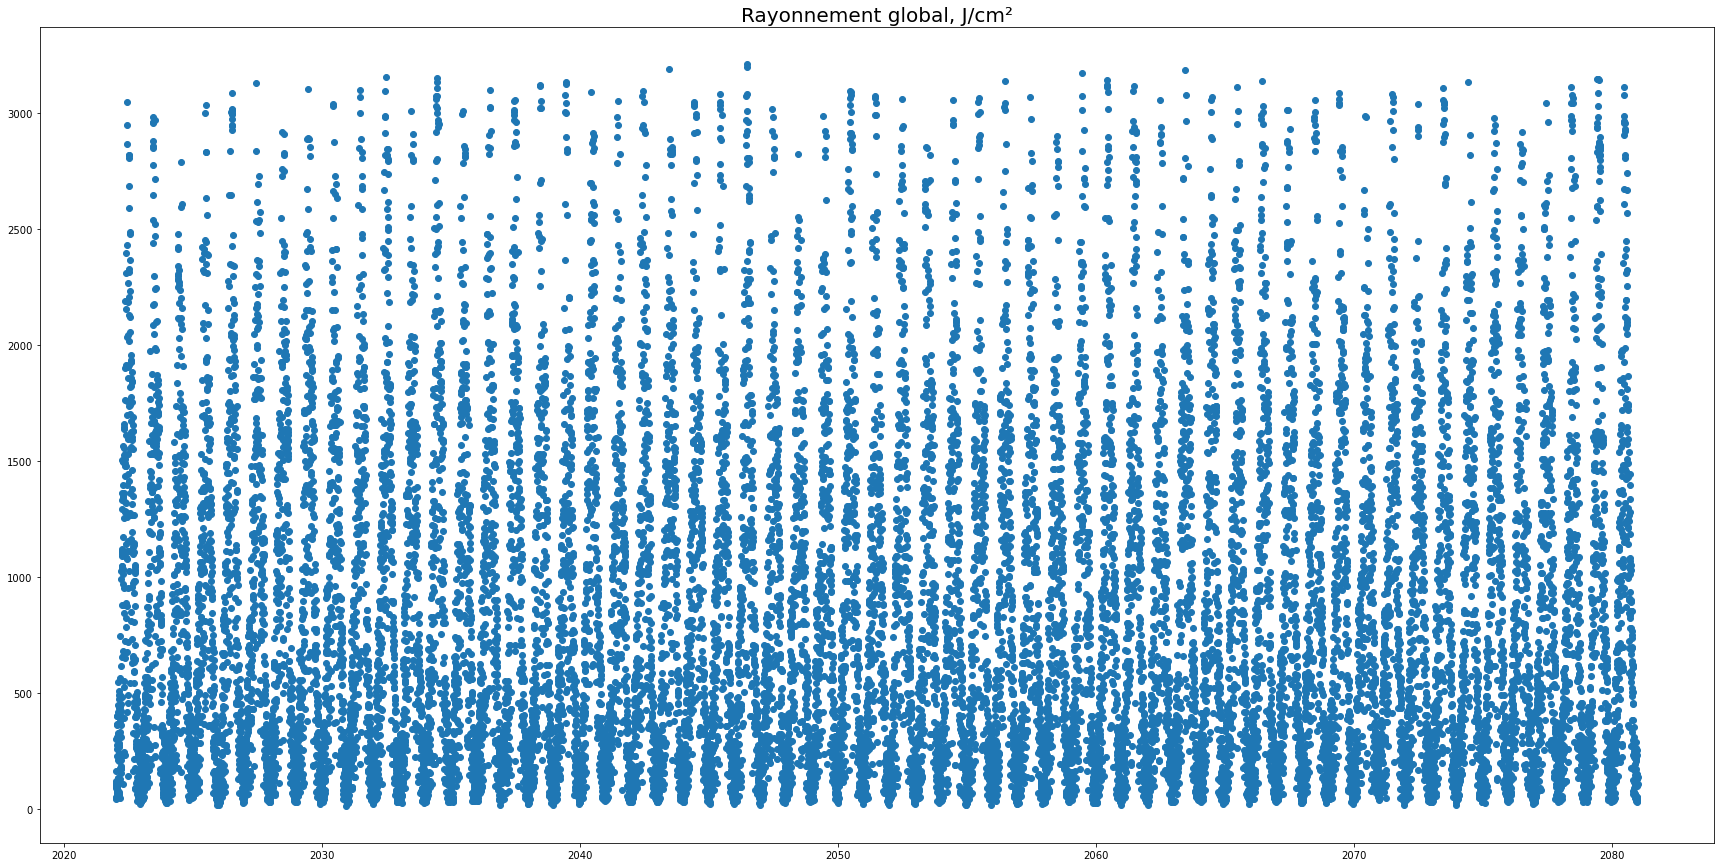

In [182]:
if select_station:
    lat = station_coord[0]
    long = station_coord[1]
    data_station = data.loc[(data.loc[:,"Latitude"] == lat) & (data.loc[:,"Longitude"] == long)]
    if culture_model:
        if plot_check :
            data_station_forAzodyn = adapt_data_for_model(data_station, 'culture', plot=True)
        else:
            data_station_forAzodyn = adapt_data_for_model(data_station, 'culture')
        data_station_forAzodyn.head()
        if year_selection:
            data_station_Year_forAzodyn = data_station_forAzodyn.loc[data_station_forAzodyn.loc[:,"AN"] == selected_year]
            data_station_Year_forAzodyn.tail()
            if export_meteo_for_model_culture:
                data_station_Year_forAzodyn.to_csv(out_file_for_model_culture, sep=';', index=False)
        else:
            if export_meteo_for_model_culture:
                data_station_forAzodyn.to_csv(out_file_for_model_culture, sep=';', index=False) 
else:
    if culture_model:
        data_forAzodyn = adapt_data_for_model(data, 'culture')
        data_forAzodyn.head()
        if export_meteo_for_model_culture:
            data_forAzodyn.to_csv(out_file_for_model_culture, sep=';', index=False)